# Worksheet 8 - Regression

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:
- Recognize situations where a simple regression analysis would be appropriate for making predictions.
- Explain the k-nearest neighbour (k-nn) regression algorithm and describe how it differs from k-nn classification.
- Interpret the output of a k-nn regression.
- In a dataset with two variables, perform k-nearest neighbour regression in R using `caret::knnregTrain()` to predict the values for a test dataset.
- Using R, execute cross-validation in R to choose the number of neighbours.
- Using R, evaluate k-nn regression prediction accuracy using a test data set and an appropriate metric (e.g., root mean square prediction error, RMSPE).
- In the context of k-nn regression, compare and contrast goodness of fit and prediction properties (namely RMSE vs RMSPE).
- Describe advantages and disadvantages of the k-nearest neighbour regression approach.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
source("tests_worksheet_08.R")
source('cleanup_worksheet_08.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




**Question 0.0** Multiple Choice: 
<br> {points: 1}

To predict a value for $Y$ for a new observation using k-nn regression, we identify the $k$-nearest neighbours and then:

A. Assign it the median of the of the $k$-nearest neighbours as the predicted value

B. Assign it the mean of the of the $k$-nearest neighbours as the predicted value

C. Assign it the mode of the of the $k$-nearest neighbours as the predicted value

D. Assign it the majority vote of the of the $k$-nearest neighbours as the predicted value

Save the letter of the answer you think is correct to a variable named `answer0.0`. Make sure you put quotations around the letter and pay attention to case.

In [2]:
# your code here
answer0.0 = 'B'

In [3]:
test_0.0()

[1] "Success!"


**Question 0.1** Multiple Choice: 
<br> {points: 1}

Of those shown below, which is the correct formula for RMSPE?


A. $RMSPE = \sqrt{\frac{\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2}{1 - n}}$

B. $RMSPE = \sqrt{\frac{1}{n - 1}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2}$

C. $RMSPE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})^2}$

D. $RMSPE = \sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}(y_i - \hat{y_i})}$ 

Save the letter of the answer you think is correct to a variable named `answer0.1`. Make sure you put quotations around the letter and pay attention to case.

In [4]:
# your code here
answer0.1 = 'C'

In [5]:
test_0.1()

[1] "Success!"


**Question 0.2**
<br> {points: 1}

The plot below is a very simple k-nn regression example, where the black dots are the data observations and the blue line is the predictions from a k-nn regression model created from this data where $k=2$.

Using the formula for RMSE/RMSPE (given in the reading), and the graph below, by hand (pen and paper or use R as a calculator) calculate RMSE for this model. Use one decimal place of precision when inputting the heights of the black dots and blue line. Save your answer to a variable named `answer0.2`

<img align="left" src="img/k-nn_RMSE.jpeg" />

In [6]:
# your code here
# fail() # No Answer - remove if you provide an answer
answer0.2 = 0.781

In [7]:
test_0.2()

[1] "Success!"


### RMSPE Definition

**Question 0.3** Multiple Choice: 
<br> {points: 1}

What does RMSPE stand for?


A. root mean squared prediction error

B. root mean squared percentage error 

C. root mean squared performance error 

D. root mean squared preference error 

Save the letter of the answer you think is correct to a variable named `answer0.3`. Make sure you put quotations around the letter and pay attention to case.

In [8]:
# your code here
answer0.3 = 'A'

In [9]:
test_0.3()

[1] "Success!"


## Marathon Training

<img src='https://media.giphy.com/media/nUN6InE2CodRm/giphy.gif' width='400'>

Source: https://media.giphy.com/media/nUN6InE2CodRm/giphy.gif

What predicts which athletes will perform better than others? Specifically, we are interested in marathon runners, and looking at how the maximum distance ran per week during training predicts the time it takes a runner to end the race? For this, we will be looking at the `marathon.csv` file in the `data/` folder.

**Question 1.0** 
<br> {points: 1}

Load the data and assign it to an object called `marathon`. 

In [11]:
# your code here
marathon = read_csv('data/marathon.csv')
head(marathon)

Parsed with column specification:
cols(
  age = col_double(),
  bmi = col_double(),
  female = col_double(),
  footwear = col_double(),
  group = col_double(),
  injury = col_double(),
  mf_d = col_double(),
  mf_di = col_double(),
  mf_ti = col_double(),
  max = col_double(),
  sprint = col_double(),
  mf_s = col_double(),
  time_hrs = col_double()
)



age,bmi,female,footwear,group,injury,mf_d,mf_di,mf_ti,max,sprint,mf_s,time_hrs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,23.59232,0,2,1,2,42195,4,10295,60,1,4.098592,2.859722
33,22.51830,0,2,2,2,42195,3,12292,50,0,3.432720,3.414444
38,25.56031,0,2,3,1,42195,4,10980,65,0,3.842896,3.050000
34,22.60793,0,2,1,1,42195,3,10694,88,1,3.945670,2.970556
39,24.97484,0,2,1,1,42195,2,13452,51,0,3.136708,3.736667
33,24.30183,1,2,2,1,42195,3,14940,40,0,2.824297,4.150000


In [12]:
test_1.0()

[1] "Success!"


**Question 2.0**
<br> {points: 1}

We want to predict race time (`time_hrs`) given a particular value of maximum distance ran per week during training (`max`). Let's take a subset of size 50 of our marathon data and assign it to an object called `marathon_50`. With this subset, plot a scatterplot to assess the relationship between these two variables. Put `time_hrs` on the y-axis and `max` on the x-axis. **Assign this plot to an object called `answer2`.** Discuss with your neighbour the relationship between race time and maximum distance ran per week during training based on the scatterplot you create below. 

*Hint: To take a subset of your data you can use the `sample_n()` function*

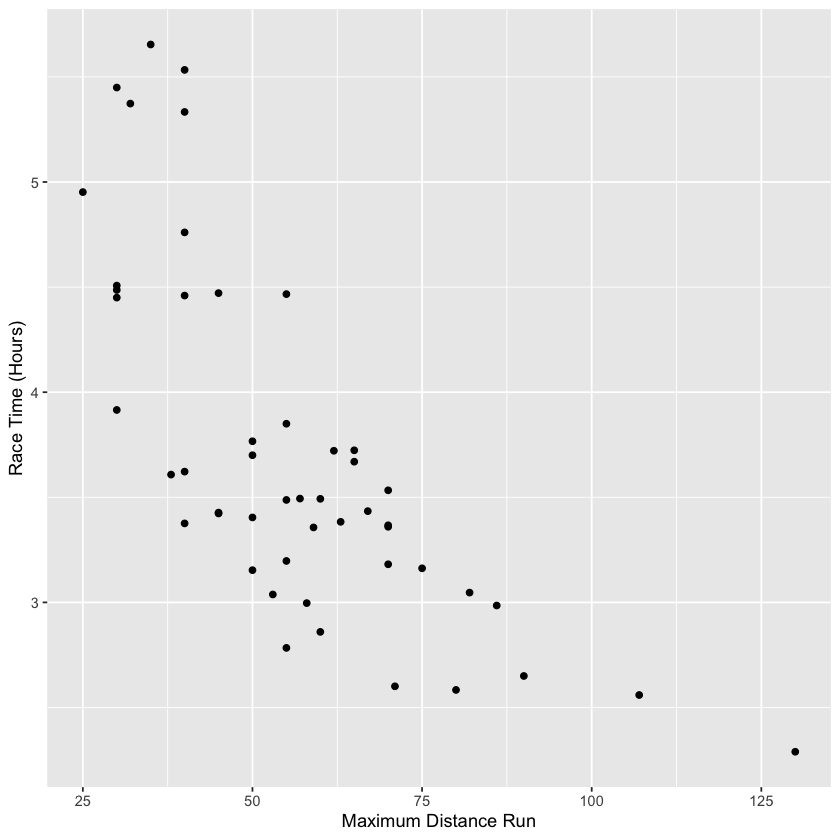

In [16]:
set.seed(2000) ### DO NOT CHANGE

marathon_50 <- marathon %>%
   sample_n(50)

# your code here
# fail() # No Answer - remove if you provide an answer
answer2 = ggplot(marathon_50, aes(x = max, y = time_hrs)) +
    geom_point() +
    labs(x="Maximum Distance Run", y="Race Time (Hours)")
answer2

In [17]:
test_2.0()

[1] "Success!"


**Question 3.0**
<br> {points: 1}

Suppose we want to predict the race time for someone who ran a maximum distance of 100 miles per week during training. In the plot below we can see that no one has ran a maximum distance of 100 miles per week. But, if we are interested in prediction, how can we predict with this data? We can use k-nn regression! To do this we get the $Y$ values (target/response variable) of the nearest $k$ values and then take their average and use that as the prediction. 

For this question we want to predict race time based on the 4 closest neighbors to the 100 miles per week during training.

Fill in the scaffolding below and assign your answer to an object named `answer3`.

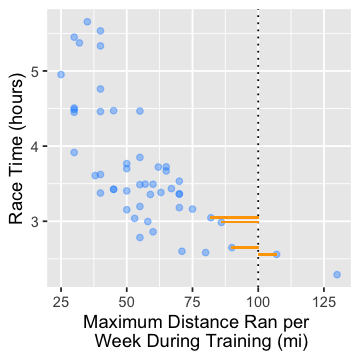

In [18]:
options(repr.plot.height = 3, repr.plot.width = 3)
marathon_50 %>%
    ggplot(aes(x = max, y = time_hrs)) + 
        geom_point(color = 'dodgerblue', alpha = 0.4) +
        geom_vline(xintercept = 100, linetype = "dotted") +
        xlab("Maximum Distance Ran per \n Week During Training (mi)") +
        ylab("Race Time (hours)") + 
        geom_segment(aes(x = 100, y = 2.56, xend = 107, yend = 2.56), col = "orange") +
        geom_segment(aes(x = 100, y = 2.65, xend = 90, yend = 2.65), col = "orange") +
        geom_segment(aes(x = 100, y = 2.99, xend = 86, yend = 2.99), col = "orange") +
        geom_segment(aes(x = 100, y = 3.05, xend = 82, yend = 3.05), col = "orange")

In [25]:
#answer3 <- ... %>% 
#  mutate(diff = abs(100 - ...)) %>% 
#  ...(diff) %>% 
#  head(...) %>%  #Controls the K
#  summarise(predicted = ...(...)) %>%
#  unlist()

answer3 <- marathon_50 %>% 
 mutate(diff = abs(100 - max)) %>% 
 arrange(diff) %>% 
 head(n=4) %>%  #Controls the K
 summarise(predicted = mean(time_hrs)) %>%
 unlist()

# your code here
# fail() # No Answer - remove if you provide an answer
answer3

predicted 
 2.810347

In [26]:
test_3.0()

[1] "Success!"


**Question 4.0**
<br> {points: 1}

For this question, let's instead predict the race time based on the 2 closest neighbors to the 100 miles per week during training.

Assign your answer to an object named `answer4`.

In [27]:
# your code here
answer4 = marathon_50 %>% 
 mutate(diff = abs(100 - max)) %>% 
 arrange(diff) %>% 
 head(n=2) %>%  #Controls the K
 summarise(predicted = mean(time_hrs)) %>%
 unlist()
answer4

predicted 
 2.604722

In [28]:
test_4.0()

[1] "Success!"


**Question 5.0** Multiple Choice:
<br> {points: 1}

Now that you have done k Nearest Neighbors predictions manually, which method would you use to choose the $k$?

- A) Choose the $k$ that excludes most outliers
- B) Choose the $k$ with the lowest training error
- C) Choose the $k$ with the lowest cross-validation error
- D) Choose the $k$ that includes the most data points
- E) Choose the $k$ with the lowest testing error

*Assing your answer to an object called `answer5`*

In [33]:
# Assign your answer to an object called: answer5
# Make sure the correct answer is an uppercase letter. 
# Surround your answer with quotation marks.
# Replace the fail() with your answer. 

# your code here
answer5 = 'C'

In [34]:
test_5.0()

[1] "Success!"


**Question 6.0**
<br> {points: 1}

We have seen how to do k-nn regression manually, now we will apply it to the whole dataset using the `caret` package. For this we first need to create a training and testing sets. Remember we won't touch the test dataset until the end. 

For this question create an object called `training_rows` that includes the indexes of the rows we will use. 

*Use 75% of the data as training data*

In [35]:
set.seed(2000) ### DO NOT CHANGE

#... <- marathon %>% 
#  select(max) %>% 
#  unlist() %>%
#  createDataPartition(p = ..., list = FALSE)

training_rows <- marathon %>% 
 select(max) %>% 
 unlist() %>%
 createDataPartition(p = 0.75, list = FALSE)

# your code here
# fail() # No Answer - remove if you provide an answer
head(training_rows)

Resample1
1
3
4
5
6
8


In [36]:
test_6.0()

[1] "Success!"


**Question 7.0**
<br> {points: 1}

Create the training and testing datasets by filling the scaffoldings below. The scaffolding for the training dataset is given below. 

Assing your answer to objects called `X_train`, `Y_train`, `X_test`, `Y_test` respectively.

*Hint: For the test dataset you can use the `-` sign inside the `slice()` function.*

In [41]:
#X_train <- marathon %>% 
#  select(...) %>% 
#  slice(training_rows) %>% 
#  data.frame()

#Y_train <- marathon %>% 
#  select(...) %>% 
#  slice(training_rows) %>% 
#  unlist()

X_train <- marathon %>% 
 select(max) %>% 
 slice(training_rows) %>% 
 data.frame()

Y_train <- marathon %>% 
 select(time_hrs) %>% 
 slice(training_rows) %>% 
 unlist()

X_test <- marathon %>% 
 select(max) %>% 
 slice(-training_rows) %>% 
 data.frame()

Y_test <- marathon %>% 
 select(time_hrs) %>% 
 slice(-training_rows) %>% 
 unlist()

# your code here
# fail() # No Answer - remove if you provide an answer

In [42]:
test_7.0()

[1] "Success!"


**Question 8.0**
<br> {points: 1}

Now that we have separated the data into training and testing sets, let's choose the $k$ for our $k$-nearest neighbours algorithm. We can do this using cross-validation as we've seen before for k-nn classification. In this exercise we will do **3-fold** cross validation searching for a K **from 1 to 150 in steps of size 10**. For this question name your model object (output from `train`) `knn_cv`. 

In [54]:
set.seed(2019) # DO NOT CHANGE
# your code here
# fail() # No Answer - remove if you provide an answer
k = data.frame(k = seq(from = 1, to = 150, by = 10))
train_control = trainControl(method = "cv", number = 3)
knn_cv = train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_cv

k-Nearest Neighbors 

698 samples
  1 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 466, 465, 465 
Resampling results across tuning parameters:

  k    RMSE       Rsquared   MAE      
    1  0.6149053  0.3082904  0.4645660
   11  0.5896347  0.3478497  0.4426492
   21  0.5870633  0.3542604  0.4431106
   31  0.5866195  0.3557208  0.4431916
   41  0.5839186  0.3613007  0.4418116
   51  0.5800274  0.3705437  0.4387593
   61  0.5815763  0.3677432  0.4404466
   71  0.5818251  0.3693024  0.4407252
   81  0.5831982  0.3692251  0.4422906
   91  0.5847786  0.3686652  0.4432872
  101  0.5850111  0.3687790  0.4443458
  111  0.5845780  0.3730007  0.4445924
  121  0.5880651  0.3697064  0.4497119
  131  0.5900726  0.3678827  0.4516132
  141  0.5919184  0.3673078  0.4541317

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 51.

In [55]:
test_8.0()

[1] "Success!"


**Question 8.1**
<br> {points: 1}

Plot the results from cross-validation as a line and point plot with cross-validation error (as $RMSPE$) on the y-axis and $k$ on the x-axis. Name your plot object `choosing_k`.

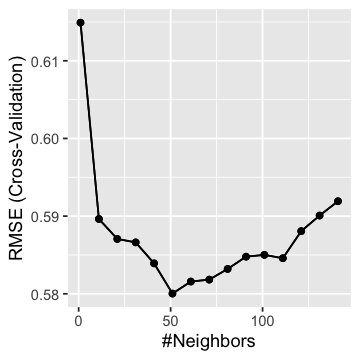

In [57]:
# your code here
# fail() # No Answer - remove if you provide an answer
choosing_k = ggplot(knn_cv, aes(y = RMSE, x = k)) + 
    geom_point() +
    geom_line()
choosing_k

In [58]:
test_8.1()

[1] "Success!"


**Question 8.2**
<br> {points: 1}

Report the best $k$ for k-nn regression for this data set. Save your answer as an object named `best_k`. We provide scaffolding to help you choose the $k$ from the long list that you came up with:

In [60]:
#best_k <- knn_cv$results %>%
#    filter(... == min(...)) %>%
#    select(..) %>%
#    unlist()

best_k <- knn_cv$results %>%
   filter(RMSE == min(RMSE)) %>%
   select(k) %>%
   unlist()

# your code here
# fail() # No Answer - remove if you provide an answer
best_k

k 
51

In [61]:
test_8.2()

[1] "Success!"


**Question 9.0**
<br> {points: 1}

Re-train your k-nn regression model with the best $k$ that you found in **Question 8** using the entire training data set. Assign the model to an object called `knn_model`.

In [64]:
set.seed(2019) # DO NOT CHANGE

# your code here
# fail() # No Answer - remove if you provide an answer
k = data.frame(k = 51)
train_control = trainControl(method = "cv", number = 3)
knn_model = train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)

knn_model

k-Nearest Neighbors 

698 samples
  1 predictor

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 466, 465, 465 
Resampling results:

  RMSE       Rsquared   MAE      
  0.5800274  0.3705437  0.4387593

Tuning parameter 'k' was held constant at a value of 51

In [65]:
test_9.0()

[1] "Success!"


**Question 10.0**
<br> {points: 1}

Using the `knn_model`, predict the test data and save it to an object called `predictions`. 

In [69]:
set.seed(2019) # DO NOT CHANGE

# your code here
# fail() # No Answer - remove if you provide an answer
predictions <- predict(knn_model, X_test)

head(predictions)

[1] 3.702976 3.156979 3.692541 3.702976 4.366422 2.873426

In [70]:
test_10.0()

[1] "Success!"


**Question 11.0**
<br> {points: 1}

Now with these predictions calculate the test error as $RMSPE$ (how well the predictions on the test data match the true values of the test data set). Use the `defaultSummary` function to obtain the test error as $RMSPE$, and name the object returned from it `test_error`.

In [71]:
set.seed(2019) # DO NOT CHANGE
# your code here
# fail() # No Answer - remove if you provide an answer
modelvalues <- data.frame(obs = Y_test, pred = predictions)
test_error <- defaultSummary(modelvalues)
test_error

RMSE  Rsquared       MAE 
0.5859353 0.3621608 0.4603113

In [72]:
test_11.0()

[1] "Success!"


**Question 11.1**

The test error is larger than the cross-validation error for the best $k$, true or false? Save your answer as `"true"` or `"false"` and name it `answer11.1`

In [73]:
# your code here
# fail() # No Answer - remove if you provide an answer
answer11.1 = 'true'

In [74]:
test_11.1()

[1] "Success!"


**Question 11.2**
<br> {points: 1}

Given that $RMSPE$ is in the units of the target/response variable, the test error $RMSPE$ seems **very** large (and thus indicates that our predictions are likely not very good). True or false? Save your answer as `"true"` or `"false"` and name it `answer11.2`

In [75]:
# your code here
answer11.2 = 'false'

In [76]:
test_11.2()

[1] "Success!"


**Question 12.0**
<br> {points: 1}

Using the `knn_model` trained on the entire training set (from Question 9.0), predict across the range of values observed in the training data set. Store the predictions as a column named `time_hrs` in a data frame named `full_predictions`. That data frame should also have a column named `max` that contains the values you predicted across.

- Use the `min` and `max` functions to find the upper and lower limits of predictor/explanatory variable values in the training data set.
- Use the `seq` function to create the column called `max` that contains the values you would like to predict across.

In [95]:
set.seed(2019) # DO NOT CHANGE
#upper <- X_train %>% 
#    select(max) %>% 
#    max() 
#lower <- ... %>% 
#    ... %>% 
#    ...
#... <- data.frame(max = seq(from = ..., to = ..., by = 1))
#full_predictions <- ... %>% 
#    mutate(... = predict(..., ...))

upper <- X_train %>% 
   select(max) %>% 
   max() 
lower <- X_train %>% 
   select(max) %>% 
   min()
interval <- data.frame(max = seq(from = lower, to = upper, by = 1))
full_predictions <- interval %>% 
   mutate(time_hrs = predict(knn_model, interval))

# your code here
# fail() # No Answer - remove if you provide an answer
head(full_predictions)
round(sum(full_predictions$time_hrs))

,max,time_hrs
,<dbl>,<dbl>
1,7,4.366994
2,8,4.366994
3,9,4.366994
4,10,4.366994
5,11,4.366994
6,12,4.366994


[1] 434

In [93]:
test_12.0()

[1] "Success!"


**Question 13.0**
<br> {points: 1}

Plot these predictions as a blue line over the data points from the training set. You will have to create a single data frame containing the training data set to do this. One way you can do this is by combining `X_train` and `Y_train` using the `bind_cols` function. Name your plot `predict_plot`.

In [106]:
# your code here
# fail() # No Answer - remove if you provide an answer
predict_plot = ggplot(bind_cols(X_train, data.frame(time_hrs = Y_train)), aes(x=max, y=time_hrs)) +
    geom_point() +
    geom_line(data=full_predictions,color="blu")
predict_plot

ERROR: Error in layer(data = data, mapping = mapping, stat = stat, geom = GeomLine, : object 'blue' not found


In [ ]:
test_13.0()